In [2]:
import os
from shutil import copy, move
import pySPM
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
root_folder = 'D:\\Research\\'
stm_root_folder = 'STM Tip Prep Data\\Gold 111 Data\\'
src_folder = '2016-02-13 Au(111) more STM and STS\\'
src_folder_path = os.path.join(root_folder, stm_root_folder)
num_files = len(os.listdir(src_folder_path)) - 1 # Skips the desktip.ini hidden file
print('Found {} files in {}'.format(num_files, src_folder_path))

Found 800 files in D:\Research\STM Tip Prep Data\Gold 111 Data\


In [7]:
dst_path = os.path.join(root_folder, stm_root_folder,'labeled_datasets\\au-111_herringbone')
not_herringbone_path = os.path.join(root_folder, stm_root_folder,'labeled_datasets\\au-111_not-herringbone')
processed_files_path = os.path.join(root_folder, stm_root_folder,'processed stm files')

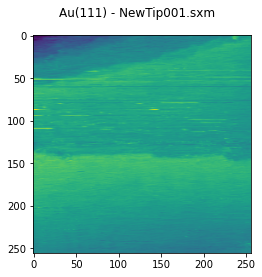

Is Herringbone present in the image (y/n)?:  n


File copied to D:\Research\STM Tip Prep Data\Gold 111 Data\labeled_datasets\au-111_not-herringbone and labeled NOT Herringbone


PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'D:\\Research\\STM Tip Prep Data\\Gold 111 Data\\Au(111) - NewTip001.sxm'

In [11]:
for file in os.listdir(src_folder_path):
    try:
        if file.endswith(".sxm"):
            # Read sxm STM data
            src_path = os.path.join(src_folder_path,file)
            data = pySPM.SXM(src_path)
            image = data.get_channel('Z').correct_plane(inline=False)
            
            # Plot current image
            fig = plt.figure()
            plt.suptitle(file)
            plt.imshow(image.pixels)
            plt.pause(0.2)
            
            # Wait for and validate label input
            valid_input = False
            while (not valid_input):
                label = input("Is Herringbone present in the image (y/n)?: ")
                if (label == 'y'):
                    copy(src_path, dst_path)
                    valid_input = True
                    print('File copied to {} and labeled Herringbone'.format(dst_path))
                elif (label == 'n'):
                    copy(src_path, not_herringbone_path)
                    valid_input = True
                    print('File copied to {} and labeled NOT Herringbone'.format(not_herringbone_path))
                else:
                    print('Invalid input. Please enter \'y\' or \'n\'.')
            
            plt.close()
            move(src_path, processed_files_path)
            print('----------------------------------------------------------------------')
            
    except Exception as e:
        raise e
        print("Error! No files found here or some input problem occured!")

print('All files in folder have been labeled.')